3.1. MNIST
- => 데이터셋 설명 : 손으로 쓴 70000개의 작은 숫자 이미지


In [121]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False) # 이미지 파일이기 때문에 데이터프레임은 잘 맞지 않아 교재에서는 넘파이 배열로 데이터를 받았음.

c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [122]:
X, y = mnist.data, mnist.target
X # 데이터

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [123]:
X.shape

(70000, 784)

In [124]:
y # 타겟(정답지)

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [125]:
# y.shape

In [126]:
# 책을 따라서 입력을 해 보았는데 직접 그림판으로 그린 이미지를 불러왔더니 reshape이 되지 않는 문제가 발생하였다.

# import matplotlib.pyplot as plt

# def plot_digit(image_data) : #이미지 데이터 출력 함수.
#     image = image_data.reshape(28,28) # 28*28 배열로 크기 조정
#     plt.imshow(image, cmap='binary') # binary = 0을 흰색, 255를 검은색으로 나타내는 흑백 컬러맴
#     plt.axis('off') # 무슨 뜻? => 축을 표기하지 않음.

# some_digit = X[0] # Aㅏ. 데이터 안에 들어있는 첫번째 이미지.
# print(some_digit)
# plot_digit(some_digit)
# plt.show()
# print(type(some_digit)) # 파일 확인해봄.`b`

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

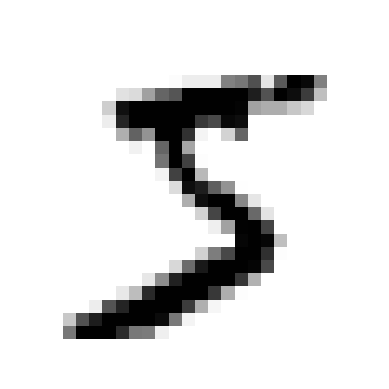

<class 'numpy.ndarray'>


In [127]:
# 무수한 시행착오 끝에 그냥 reshape 문장을 밖으로 빼냈다.
import matplotlib.pyplot as plt

def plot_digit(image) : #이미지 데이터 출력 함수.
    plt.imshow(image, cmap='binary') # binary = 0을 흰색, 255를 검은색으로 나타내는 흑백 컬러맵
    plt.axis('off') # 무슨 뜻? => 축을 표기하지 않음.

some_digit = X[0] # Aㅏ. 데이터 안에 들어있는 첫번째 이미지.
some_digit = some_digit.reshape(28,28)
some = X[0]
print(some_digit)
plot_digit(some_digit)
plt.show()
print(type(some_digit)) # 파일 확인해봄.

In [128]:
# # 이미지를 사용하기 위해 PIL 모듈을 불러왔다.
# from PIL import Image
# import numpy as np

# path = '0.png' #그림 경로
# img = Image.open(path) # 그림 파일 연다
# img = img.convert('L') # 그레이스케일로 변경
# # img = np.array(img) # narray로 형태 변환
# img = np.resize(img,(1,784) )
# test_data = 255-img


#plot_digit(img) # >> 성공적으로 출력되었다.

In [129]:

y[0] # 위 이미지의 실제 글자..정보

'5'

In [130]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [131]:
y_test.shape

(10000,)

In [154]:
# 이진 분류기 훈련 
y_train_5 = (y_train == '5') # '5' == True 나머지는 False
y_test_5 = (y_test == '5')

In [155]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

modelL = LogisticRegression()
modelL.fit(X_train, y_train_5)
print(modelL.score(X_test, y_test_5))

0.9779


c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [156]:
# 이미지를 사용하기 위해 PIL 모듈을 불러왔다.
from PIL import Image
import numpy as np

path = '5_3.png' #그림 경로
img = Image.open(path) # 그림 파일 연다
img = img.convert('L') # 그레이스케일로 변경
# img = np.array(img) # narray로 형태 변환
img = np.resize(img,(1,784) )
test_data = 255-img

print(sgd_clf.predict([some]), modelL.predict([some]))
print(sgd_clf.predict(test_data))

[ True] [ True]
[False]


In [135]:
# 성능 측정
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3) # 훈련세트를 k개 (여기서 3개)로 나눈다.
for train_index, test_index in skfolds.split(X_train, y_train_5) :
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))


0.95035
0.96035
0.9604


In [136]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [137]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))
# False가 출력됩니다. 즉, True로 예측된 것이 없습니다.



False


In [138]:
print(cross_val_score(dummy_clf, X_train, y_train_5, cv =3, scoring = 'accuracy'))

[0.90965 0.90965 0.90965]


In [139]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)


In [140]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)

print(cm)

[[53892   687]
 [ 1891  3530]]


In [141]:
y_train_perfect_predictions = y_train_5 # 완벽한 분류기일 경우
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [142]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(precision_score(y_train_5, y_train_predL))

0.8370879772350012
0.8903970826580226


In [143]:
print(recall_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_predL))

0.6511713705958311
0.8107360265633647


In [144]:
from sklearn.metrics import f1_score
print(f1_score(y_train_5, y_train_pred))
print(f1_score(y_train_5, y_train_predL))

0.7325171197343846
0.8487013613980882


In [145]:
y_scores = sgd_clf.decision_function([some])


In [146]:
threshold = 0
y_some_digit_pred = (y_scores >threshold)

print(y_some_digit_pred)

[ True]


In [147]:
# threshold = 3000
# y_some_digit_pred = (y_scores > threshold)
# y_some_digit_pred

In [148]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method='decision_function')

In [149]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

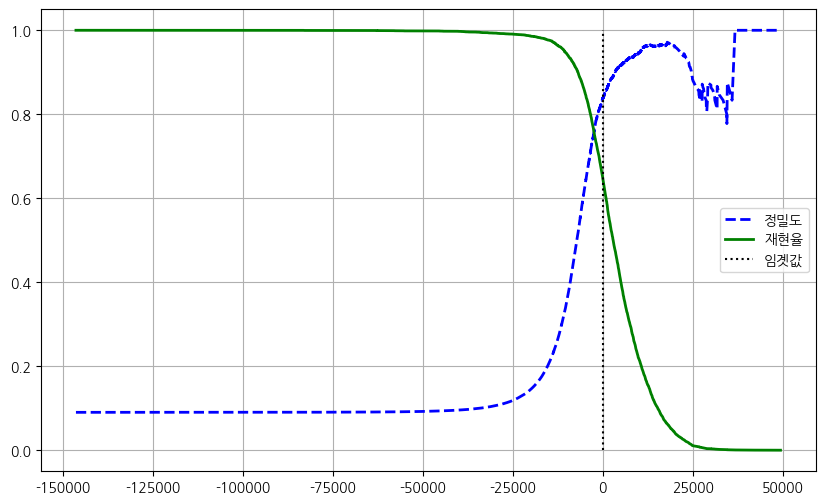

In [150]:
import koreanize_matplotlib
plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions[:-1], 'b--', label = '정밀도', linewidth = 2)
plt.plot(thresholds, recalls[:-1], 'g-', label = '재현율', linewidth = 2)
plt.vlines(threshold, 0, 1.0, 'k', 'dotted', label='임곗값')
plt.grid()
plt.legend()
plt.show()

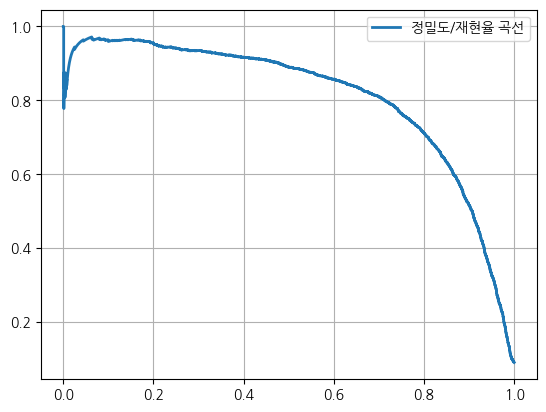

In [151]:
plt.plot(recalls, precisions, linewidth=2, label='정밀도/재현율 곡선')
plt.grid()
plt.legend()
plt.show()